# Jimmy Wrangler, Data Explorer
          Project 1 - EECS 731 
          Author name: Sirisha Thippabhotla
          Id: 2852704


# Step 1: Importing the required libraries 

In [1]:
# import modules
import numpy as np
import pandas as pd
import quandl
from itertools import combinations
from datetime import datetime
from datetime import timedelta

# plotting preferences
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Reading the datasets - users, ratings and movies from the MovieLens dataset and another credits dataset from Kaggle

In [2]:
#Reading users data
col_users = ['user_id', 'sex', 'age', 'occupation', 'zip_code']
df1_users = pd.read_csv('ml-1m/users.dat', sep='::', names=col_users,engine='python')

#Reading ratings data
col_ratings = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
df1_ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', names=col_ratings,engine='python')

#Reading movies data
col_mov = ['movie_id', 'title' ,'genre']
df1_movies = pd.read_csv('ml-1m/movies.dat', sep='::', names=col_mov, engine='python')

#Reading cast and crew information from Kaggle dataset:
df2_credits = pd.read_csv('the-movies-dataset/credits.csv',low_memory=False)


# Step 3: Printing the information of the four dataframes 

In [3]:
print "Users Info\n"
df1_users.info()

print "\nRatings Info\n"
df1_ratings.info()

print "\nMovies Info\n"
df1_movies.info()

print "\nCredits Info\n"
df2_credits.info()

Users Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
sex           6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zip_code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB

Ratings Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id           1000209 non-null int64
movie_id          1000209 non-null int64
rating            1000209 non-null int64
unix_timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB

Movies Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genre       3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB

Credits Info

<class 'pandas.core.frame.DataFrame'>
RangeI

In [4]:
#Printing the number of rows and columns in movies dataframe 
df1_movies.shape

(3883, 3)

In [5]:
#Printing the datatypes present in the movies dataframe 
df1_movies.dtypes

movie_id     int64
title       object
genre       object
dtype: object

In [6]:
#Checking if there are any null values in the dataframe 
df1_movies.isnull().sum()

movie_id    0
title       0
genre       0
dtype: int64

In [8]:
df1_movies.describe()

,movie_id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [9]:
# Renaming the column 'id' in credit dataframe to 'movie_id' to merge with the movie dataframe
df2_credits = df2_credits.rename(columns={'id':'movie_id'})

In [10]:
#Printing the first few lines of the credits dataframe
df2_credits.head()

,cast,crew,movie_id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [11]:
df1_movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


# Step 4: Merging three datasets into one dataframe 

In [16]:
# create one merged datadrame of movies and ratings
movie_ratings = pd.merge(df1_movies, df1_ratings)

#Now we merge the movies_ratings with users dataframe
final_df = pd.merge(movie_ratings, df1_users)

In [36]:
final_df.head()

,movie_id,title,genre,user_id,rating,sex,age,occupation,age_group
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,0-9
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10,0-9
2,150,Apollo 13 (1995),Drama,1,5,F,1,10,0-9
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10,0-9
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10,0-9


# Step 5: Removing columns from the final merged dataframe that are not needed for our purpose

In [18]:
#Deleting unnecessary columns from the final merged dataframe - deleting columns unix_timestamp and zip_code

del final_df['unix_timestamp']
del final_df['zip_code']

In [20]:
#Printing final_df information after deleting columns
final_df.shape
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
movie_id      1000209 non-null int64
title         1000209 non-null object
genre         1000209 non-null object
user_id       1000209 non-null int64
rating        1000209 non-null int64
sex           1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [21]:
final_df.head()

,movie_id,title,genre,user_id,rating,sex,age,occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10


# Step 6: Doing some exploratory data analysis on the columns in the dataframe 

    -Getting most rated movies, based on user ratings 
    -Getting mean of all ratings for each movie 
    -Some basic visualizations based on columns in the dataframes
    -Sorting the columns based on the age-group of the users 

In [45]:
#Getting the top 50 most rated movied from the dataset, based on the total number of ratings by users 
most_rated = final_df.groupby('title').size().sort_values(ascending=False)[:50]
most_rated

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [38]:
#Prining the top 25 total number of votes given by each user, based on user id
final_df['user_id'].value_counts()[:25]

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
5795    1277
4344    1271
1980    1260
2909    1258
1449    1243
4510    1240
424     1226
4227    1222
5831    1220
3391    1216
3841    1216
4508    1211
1088    1176
5367    1169
3808    1158
Name: user_id, dtype: int64

In [57]:
#getting movie stats - mean rating per movie
movie_stats = final_df.groupby('title').agg({'rating':[np.size,np.mean]})
movie_stats.head()

rating          
                                size      mean
title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

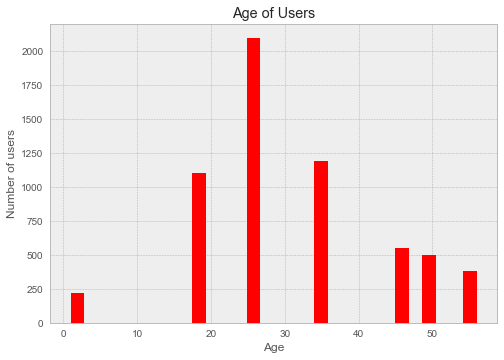

In [29]:
df1_users.age.plot.hist(bins=30, color='red')
plt.title("Age of Users")
plt.ylabel('Number of users')
plt.xlabel('Age');

In [30]:
df1_users.head()

,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116638c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cbcef10>]], dtype=object)

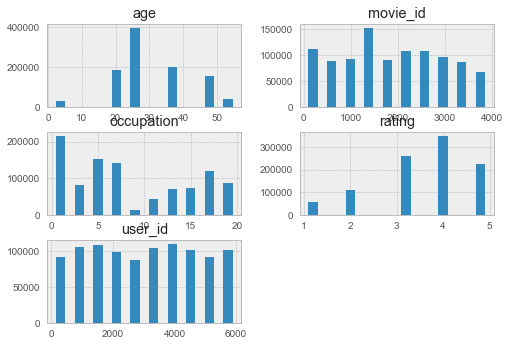

In [31]:
final_df.hist(rwidth=0.5, bins=10)

In [32]:
final_df.shape

(1000209, 8)

In [33]:
#Sorting the ages based on the age groups they belong to (as per the README file provided by the dataset)

age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59']
final_df['age_group'] = pd.cut(final_df.age, range(0, 61, 10), right=False, labels=age_groups)
final_df[['age', 'age_group']].drop_duplicates()

,age,age_group
0,1,0-9
53,50,50-59
124,25,20-29
369,35,30-39
770,18,10-19
2778,45,40-49
5001,56,50-59


In [46]:
#Getting the size and mean of ratings by users of different age groups 

age_group = final_df.groupby('age_group').agg({'rating': [np.size, np.mean]})
age_group

rating          
             size      mean
age_group                  
0-9         27211  3.549520
10-19      183536  3.507573
20-29      395556  3.545235
30-39      199003  3.618162
40-49       83633  3.638062
50-59      111270  3.732677

In [50]:
#Grouping dataset based on the user ratings 

user_ratings = final_df.groupby('user_id').agg([np.size,np.mean])

In [59]:
final_df.head()

,index,movie_id,title,genre,user_id,rating,sex,age,occupation,age_group
0,0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,0-9
1,1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10,0-9
2,2,150,Apollo 13 (1995),Drama,1,5,F,1,10,0-9
3,3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10,0-9
4,4,527,Schindler's List (1993),Drama|War,1,5,F,1,10,0-9


In [58]:
final_df.reset_index('movie_id', inplace=True)

In [107]:
user_ratings = user_ratings.drop('age',axis=1)

user_ratings = user_ratings.drop('occupation',axis=1)

In [109]:
user_ratings.head()

movie_id              rating          
            size         mean   size      mean
user_id                                       
1             53  1560.547170     53  4.188679
2            129  1784.015504    129  3.713178
3             51  1787.450980     51  3.901961
4             21  1932.000000     21  4.190476
5            198  1762.747475    198  3.146465

Text(0.5,0,'Size')

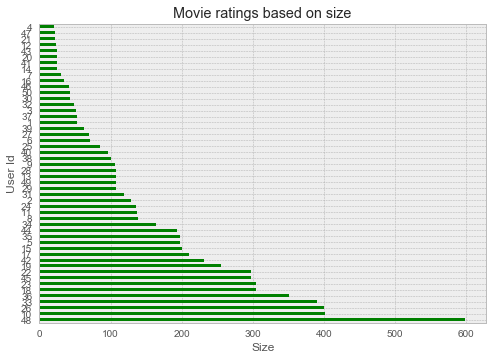

In [156]:
#Plotting the top 50 movie ratings based on the size of ratings per movie 

user_ratings['rating']['size'].head(50).sort_values(ascending=False).plot(kind='barh',color='green')
plt.ylabel("User Id")
plt.title("Movie ratings based on size")
plt.xlabel("Size")


In [147]:
#Grouping dataset based on the movie id

movies_ratings_grp = final_df.groupby('movie_id').agg([np.size,np.mean])

In [148]:
movies_ratings_grp.head()

index                user_id              rating             age  \
          size           mean    size         mean   size      mean  size   
movie_id                                                                    
1         2077  292611.001444    2077  3053.819933   2077  4.146846  2077   
2          701  383047.407989     701  3027.977175    701  3.201141   701   
3          478  420115.355649     478  2632.156904    478  3.016736   478   
4          170  423756.700000     170  3268.841176    170  2.729412   170   
5          296  389966.952703     296  3143.152027    296  3.006757   296   

                    occupation            
               mean       size      mean  
movie_id                                  
1         27.700530       2077  8.067886  
2         27.800285        701  7.680456  
3         29.276151        478  7.826360  
4         27.788235        170  6.752941  
5         27.425676        296  7.506757

In [149]:
movies_ratings_grp.columns

MultiIndex(levels=[[u'index', u'user_id', u'rating', u'age', u'occupation'], [u'size', u'mean']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]])

In [153]:
movies_ratings_grp.head()

index                user_id              rating             age  \
          size           mean    size         mean   size      mean  size   
movie_id                                                                    
1         2077  292611.001444    2077  3053.819933   2077  4.146846  2077   
2          701  383047.407989     701  3027.977175    701  3.201141   701   
3          478  420115.355649     478  2632.156904    478  3.016736   478   
4          170  423756.700000     170  3268.841176    170  2.729412   170   
5          296  389966.952703     296  3143.152027    296  3.006757   296   

                    occupation            
               mean       size      mean  
movie_id                                  
1         27.700530       2077  8.067886  
2         27.800285        701  7.680456  
3         29.276151        478  7.826360  
4         27.788235        170  6.752941  
5         27.425676        296  7.506757

Text(0.5,0,'Mean')

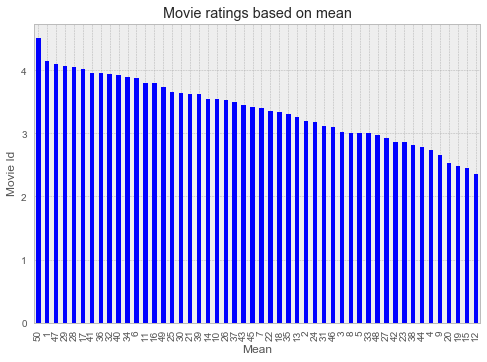

In [157]:
#Plotting the top 50 movie ratings based on the size of ratings per movie 

movies_ratings_grp['rating']['mean'].head(50).sort_values(ascending=False).plot(kind='bar',color='blue')
plt.ylabel("Movie Id")
plt.title("Movie ratings based on mean")
plt.xlabel("Mean")
